# RETO | Caso Líneas Aéreas por Marco Armando Escobar

### Duración: 2.5 horas 
 
### Introducción 
El transporte aéreo o transporte por avión es el servicio de trasladar de un lugar a otro, pasajeros o cargamento mediante la utilización de aeronaves con fines lucrativos. Los adelantos de la navegación aérea y las telecomunicaciones, así como las facilidades electrónicas, han permitido que la aviación haya progresado de forma asombrosa. Uno de los datos relevantes dentro del servicio de las líneas aéreas es el tiempo, esto es el llegar a tiempo al destino ofertado. De igual manera existen otros factores clave, y uno de ellos, que es clave, es el precio del boleto al destino deseado.

### Objetivo
El negocio desea brindar un mejor servicio a los clientes de las líneas aéreas, para conseguirlo, es necesario determinar y analizar las variables relevantes en el servicio. En especial los factores clave que determinan el precio del boleto.

### Instrucciones
- 1. Usa las dos bases de datos para definir y analizar las variables y poner realizar lo siguiente. 
- 2. Análisis descriptivo de las variables que describen el comportamiento del Servicio en las aerolíneas: 
- 3. Análisis de multicolinealidad.
- 4. Construir la ecuación o modelo matemático (copia y pega de la información proporcionada) Indica si el modelo es congruente, es decir, no presenta efectos de multicolinealidad.
- 5. Validación estadística del modelo:
     - Medidas de calidad del ajuste.
     - Prueba de hipótesis para la ecuación (F).
     - Prueba de hipótesis para cada una de las variables independientes (t).
- 6. Validación de supuestos:
     - Normalidad en los residuales.
     - Errores con varianza constante.
     - Independencia de los errores.
     - Predicción del precio de venta.


### Importamos paqueterias

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
from IPython.display import display


### Importamos base de datos

In [273]:
regresion = pd.read_csv("/Users/marcoescobararrazola/Documents/RETO_CausalPredictivo/data/DescargarCasoAerolineasDatos.csv")
originales = pd.read_excel("/Users/marcoescobararrazola/Documents/RETO_CausalPredictivo/data/DescargarDatosOriginales.xlsx",sheet_name='DatosOriginales')

In [274]:
originales

,Airline,AA,Delta,United,Airport Code-1,Airport Code,Airport Name,Days from Purchase to Travel,Fare Type,Business,...,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Type of Traveler,Infrequent,Frequent,Extreme
0,Delta,0,1,0,GRB,GRB,Austin Straubel International Airport,47,Business,1,...,0,0,0,0,0,5,Casual,0,0,0
1,American Airlines,1,0,0,SLC,SLC,Salt Lake City International Airport,88,Economy,0,...,0,0,0,0,0,5,Casual,0,0,0
2,United,0,0,1,SLC,SLC,Salt Lake City International Airport,31,Economy,0,...,0,0,0,0,0,5,Casual,0,0,0
3,American Airlines,1,0,0,SLC,SLC,Salt Lake City International Airport,38,First Class,0,...,0,0,0,0,0,9,Casual,0,0,0
4,Southwest,0,0,0,ELP,ELP,El Paso International Airport,46,First Class,0,...,0,0,0,0,0,7,Casual,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Southwest,0,0,0,DAL,DAL,Dallas Love Field,44,First Class,0,...,0,0,0,1,0,18,Extreme,0,0,1
104,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,54,First Class,0,...,0,0,0,1,0,16,Extreme,0,0,1
105,United,0,0,1,MEM,MEM,Memphis International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0
106,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0


### Estadística Descriptiva

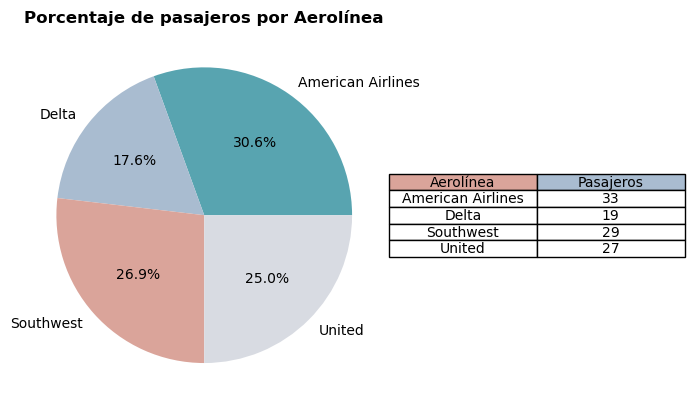

In [275]:
#Pasajeor por Arelinea:
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#A9BCD0']
Pasajeros_Aero = originales.groupby(by='Airline').count()['AA']
Pasajeros_Aero = Pasajeros_Aero.rename("Pasajeros")
plt.pie(x=Pasajeros_Aero, colors=mis_colores, labels=Pasajeros_Aero.index.to_list(),  autopct='%1.1f%%')
plt.title("Porcentaje de pasajeros por Aerolínea", fontdict={'fontweight':'bold'})
plt.table(cellText=Pasajeros_Aero.reset_index().values, colLabels=["Aerolínea", "Pasajeros"],
                  cellLoc='center', loc='right', colColours=['#DAA49A', '#A9BCD0'], colWidths = [0.4, 0.4])
plt.show()

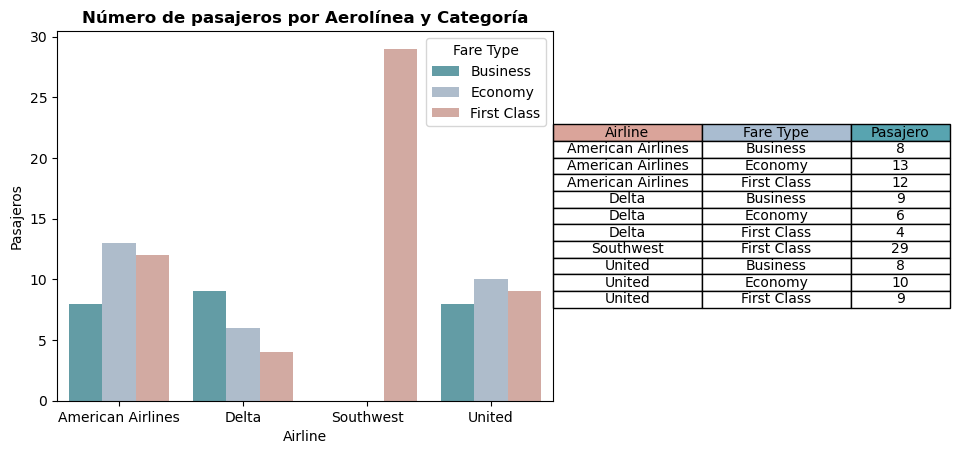

In [276]:
# Pasajeros por Areolinea y Categorí
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A']
Aero_Cat = originales.groupby(by = ['Airline', 'Fare Type']).count()['AA'].reset_index()
Aero_Cat = Aero_Cat.rename(columns = {'AA':'Pasajeros'}, )

sns.barplot(data = Aero_Cat, x = 'Airline', y = 'Pasajeros', hue = 'Fare Type', palette=mis_colores)
plt.title('Número de pasajeros por Aerolínea y Categoría', fontdict = {'fontweight':'bold'})
plt.table(cellText=Aero_Cat.values, colLabels=["Airline", "Fare Type", "Pasajero"],
                  cellLoc='center', loc='right', colColours=['#DAA49A', '#A9BCD0', '#58A4B0'], colWidths = [0.3, 0.3, 0.2]);

In [277]:
# Pasajeros por frecuencia de vuelo-aerolínea-tipo de tarifa
Business = originales[originales['Fare Type']=='Business']
Business = Business.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()
Economy = originales[originales['Fare Type']=='Economy']
Economy = Economy.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()
First_Class = originales[originales['Fare Type']=='First Class']
First_Class = First_Class.groupby(by = ['Airline','Type of Traveler']).count()['AA'].reset_index()


In [278]:
Business = Business.rename(columns = {"AA":"Pasajeros"})
Economy = Economy.rename(columns = {"AA":"Pasajeros"})
First_Class = First_Class.rename(columns = {"AA":"Pasajeros"})

# Hacemos tablas wider con pivot table
table_Buss = Business.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)
table_Economy = Economy.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)
table_FC = First_Class.pivot_table(values="Pasajeros", index="Airline", columns="Type of Traveler", fill_value= 0)


/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_2162/3602946790.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(Business, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[0,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_2162/3602946790.py:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(Economy, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[1,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_2162/3602946790.py:21: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(First_Class, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[2,0],
/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ip

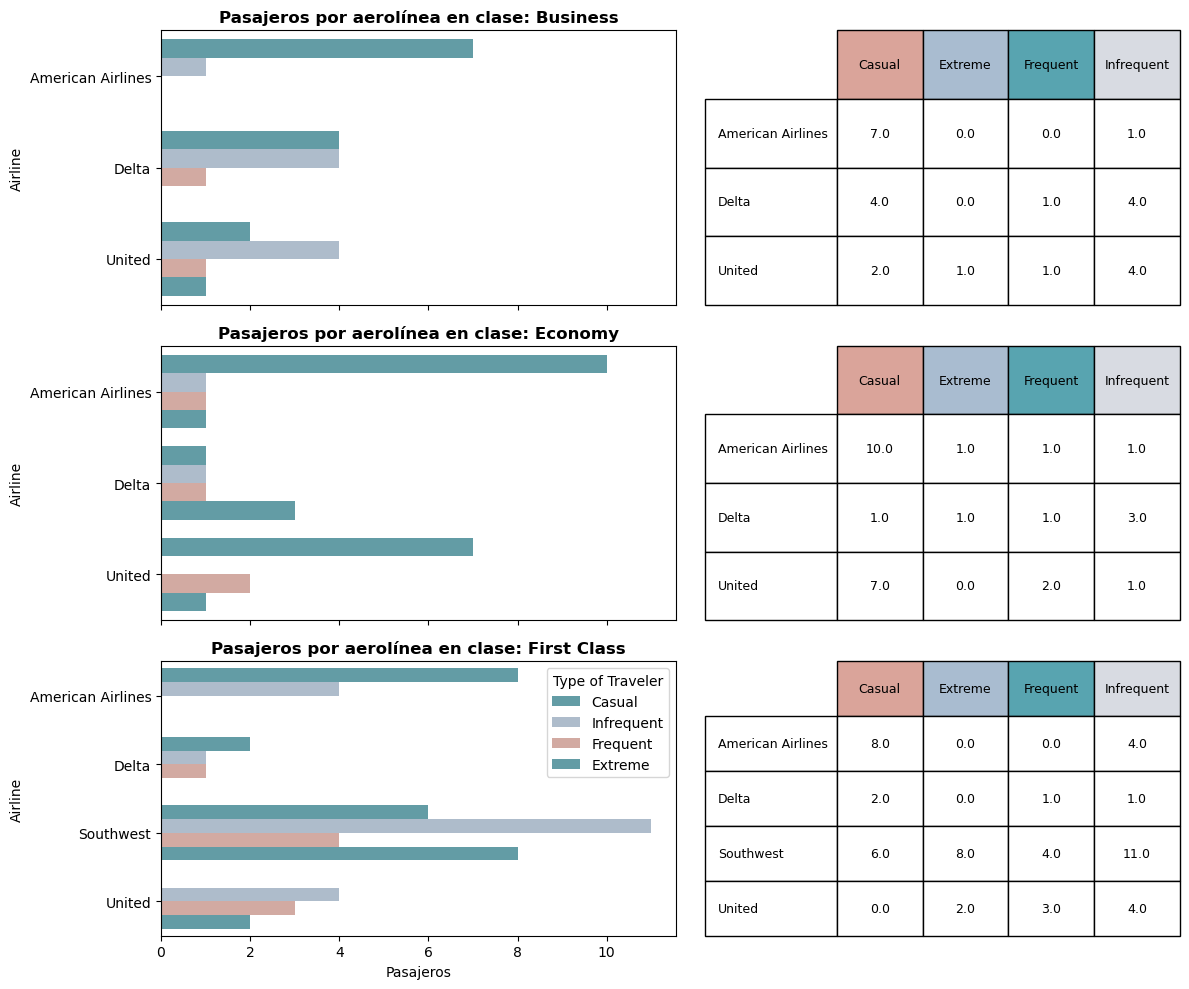

In [279]:

fig, ax = plt.subplots(3,2, figsize = (12, 10), sharex=True, gridspec_kw={'width_ratios': [3, 2]},
    constrained_layout=True)
sns.barplot(Business, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[0,0], 
            palette=mis_colores, legend=False)
ax[0,0].set_title("Pasajeros por aerolínea en clase: Business", fontdict = {"fontweight":"bold"})
ax[0,1].axis('off')
ax[0,1].table(cellText=table_Buss,cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])


sns.barplot(Economy, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[1,0], 
            palette=mis_colores, legend=False)
ax[1,0].set_title("Pasajeros por aerolínea en clase: Economy", fontdict = {"fontweight":"bold"})
ax[1,1].axis('off')
ax[1,1].table(cellText=table_Economy, cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])


sns.barplot(First_Class, x= "Pasajeros", y = "Airline", hue = "Type of Traveler", orient = "h", ax=ax[2,0], 
            palette=mis_colores)
ax[2, 0].set_title("Pasajeros por aerolínea en clase: First Class", fontdict = {"fontweight":"bold"})
ax[2,1].axis('off')
ax[2,1].table(cellText=table_FC, cellLoc='center', loc='center', bbox=[0, 0, 1, 1], 
              colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2'], 
              colWidths = [0.4, 0.4, 0.4, 0.4, 0.4])

plt.ylabel("Aerolinea")
plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Número de vuelos – ruta de vuelo por aerolínea')

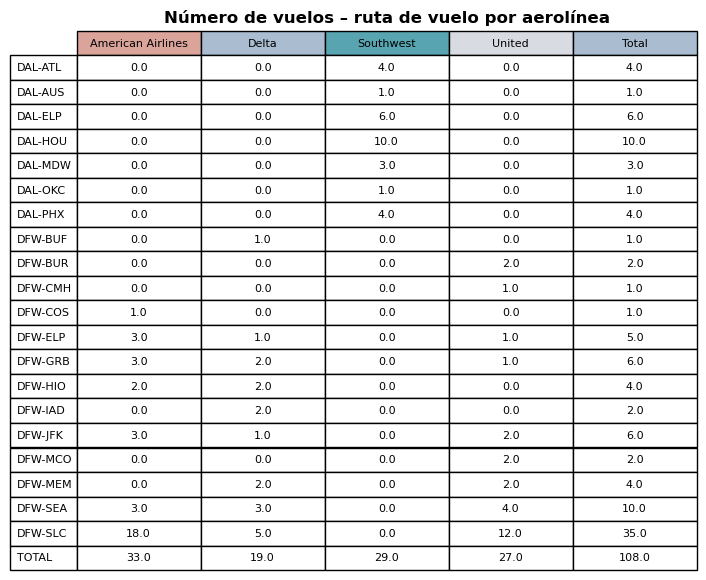

In [280]:
Ruta = originales.groupby("Airline")["Route"].value_counts().reset_index()
Ruta =  Ruta.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Ruta.index.name = " "
Ruta.columns.name = "Route"
Ruta['Total'] = Ruta.sum(axis=1, numeric_only=True)
Ruta.loc['TOTAL'] = Ruta.sum(numeric_only=True)


fig, ax = plt.subplots(figsize = (8,7))
ax.axis("off")
ax.table(cellText=Ruta.to_numpy(),
         rowLabels=Ruta.index.tolist(),
         colLabels=Ruta.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax.set_title("Número de vuelos – ruta de vuelo por aerolínea", fontdict = {"fontweight":"bold"})

In [281]:
Business = originales[originales['Fare Type']=='Business'].groupby("Airline")["Route"].value_counts().reset_index()
Business =  Business.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)

Economy = originales[originales['Fare Type']=='Economy'].groupby("Airline")["Route"].value_counts().reset_index()
Economy =  Economy.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby("Airline")["Route"].value_counts().reset_index()
First_Class =  First_Class.pivot_table(values="count", index = "Route", columns="Airline", fill_value=0)
First_Class['Total'] = First_Class.sum(axis=1, numeric_only=True)
First_Class.loc['TOTAL'] = First_Class.sum(numeric_only=True)


Text(0.5, 1.0, 'Vuelos por ruta-aerolínea -tipo de tarifa (First Class)')

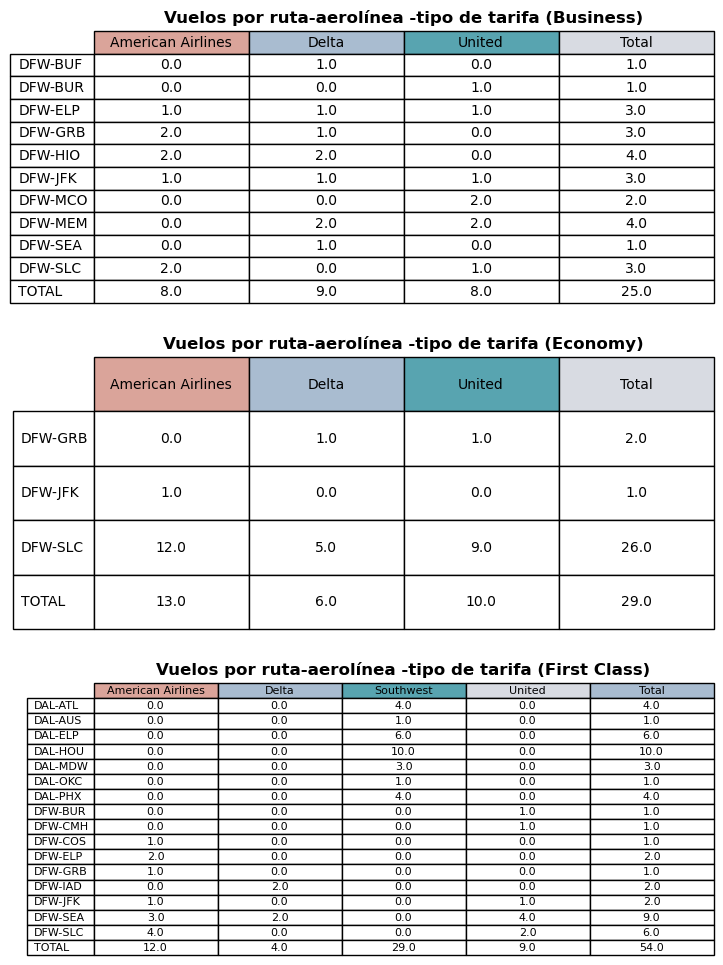

In [282]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Vuelos por ruta-aerolínea -tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

In [283]:
Business = originales[originales['Fare Type']=='Business'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
Business =  Business.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Business.index.name = " "
Business.columns.name = "Route"
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)


Economy = originales[originales['Fare Type']=='Economy'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
Economy =  Economy.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Economy.index.name = " "
Economy.columns.name = "Route"
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby(["Airline", "Route"])["Ticket Price"].sum().reset_index()
First_Class =  First_Class.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0, )
First_Class.index.name = " "
First_Class.columns.name = "Route"
First_Class['Total'] = round(First_Class.sum(axis=1, numeric_only=True), 2)
First_Class.loc['TOTAL'] = round(First_Class.sum(numeric_only=True),2)


Text(0.5, 1.0, 'Ingreso total -ruta por aerolínea -tipo de tarifa (First Class)')

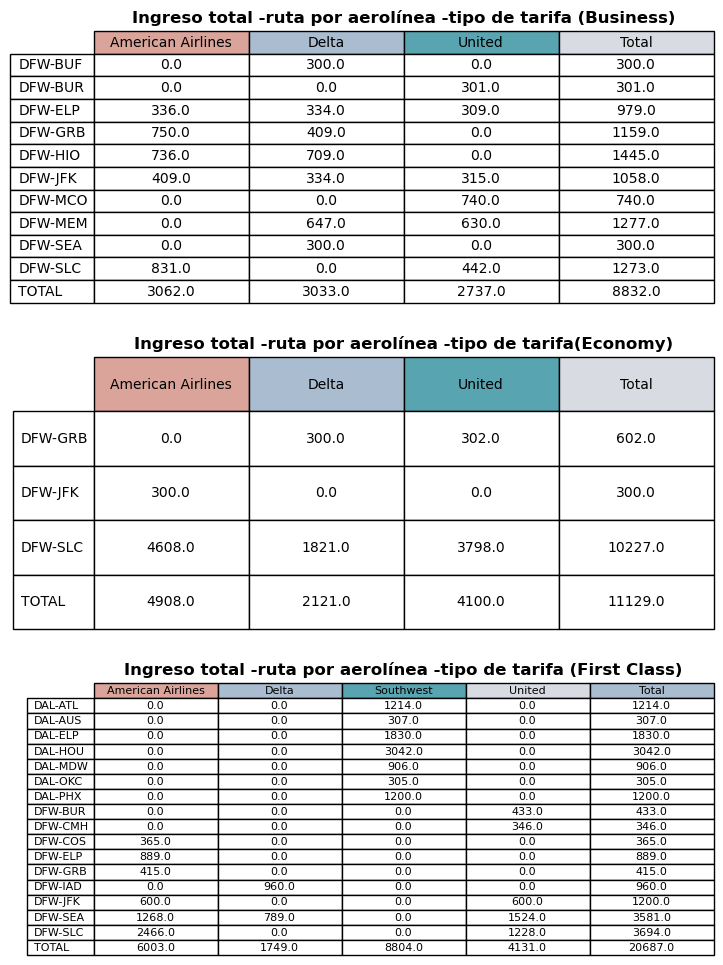

In [284]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa (Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa(Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Ingreso total -ruta por aerolínea -tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

In [285]:
Business = originales[originales['Fare Type']=='Business'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
Business =  Business.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Business.index.name = " "
Business.columns.name = "Route"
Business['Total'] = Business.sum(axis=1, numeric_only=True)
Business.loc['TOTAL'] = Business.sum(numeric_only=True)

Economy = originales[originales['Fare Type']=='Economy'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
Economy =  Economy.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0)
Economy.index.name = " "
Economy.columns.name = "Route"
Economy['Total'] = Economy.sum(axis=1, numeric_only=True)
Economy.loc['TOTAL'] = Economy.sum(numeric_only=True)

First_Class = originales[originales['Fare Type']=='First Class'].groupby(["Airline", "Route"])["Ticket Price"].mean().reset_index()
First_Class =  First_Class.pivot_table(values="Ticket Price", index = "Route", columns="Airline", fill_value=0, )
First_Class.index.name = " "
First_Class.columns.name = "Route"
First_Class['Total'] = round(First_Class.sum(axis=1, numeric_only=True), 2)
First_Class.loc['TOTAL'] = round(First_Class.sum(numeric_only=True),2)

Text(0.5, 1.0, 'Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (First Class)')

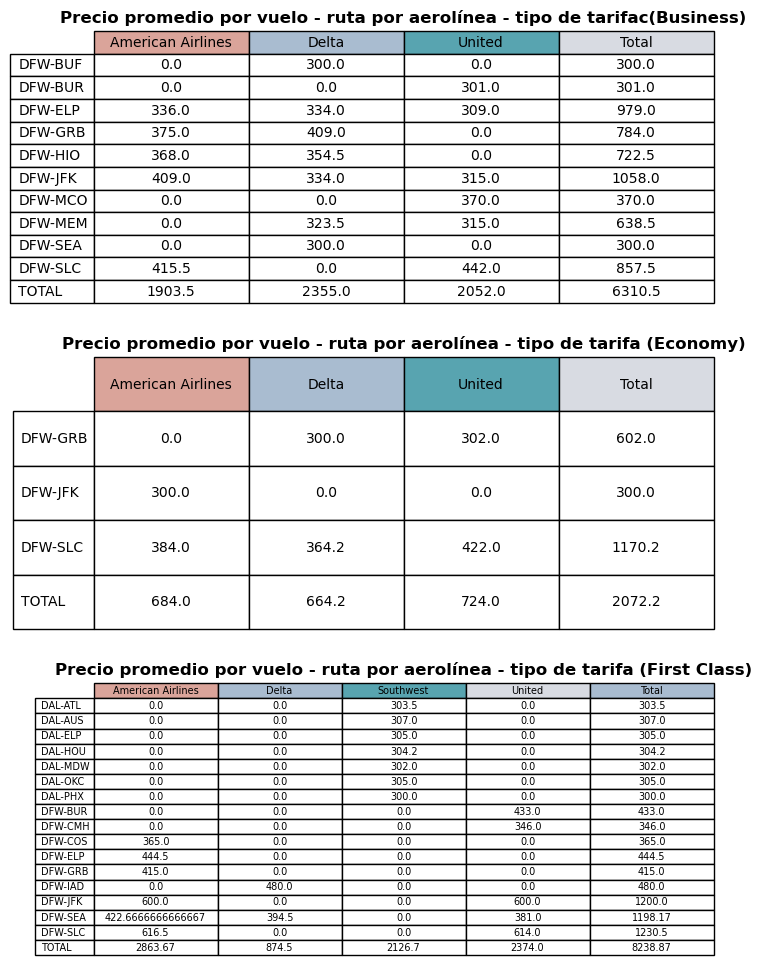

In [286]:
fig, ax = plt.subplots(3, 1, figsize = (8,12))
ax[0].axis("off")
ax[0].table(cellText=Business.to_numpy(),
         rowLabels=Business.index.tolist(),
         colLabels=Business.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[0].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifac(Business)", fontdict = {"fontweight":"bold"})
ax[1].axis("off")
ax[1].table(cellText=Economy.to_numpy(),
         rowLabels=Economy.index.tolist(),
         colLabels=Economy.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[1].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (Economy)", fontdict = {"fontweight":"bold"})
ax[2].axis("off")
ax[2].table(cellText=First_Class.to_numpy(),
         rowLabels=First_Class.index.tolist(),
         colLabels=First_Class.columns.tolist(),
         colColours=['#DAA49A', '#A9BCD0', '#58A4B0', '#D8DBE2', '#A9BCD0'],
         cellLoc='center',
         loc='center',
         bbox=[0, 0, 1, 1] )
ax[2].set_title("Precio promedio por vuelo - ruta por aerolínea - tipo de tarifa (First Class)", fontdict = {"fontweight":"bold"})

Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Ticket Price)')

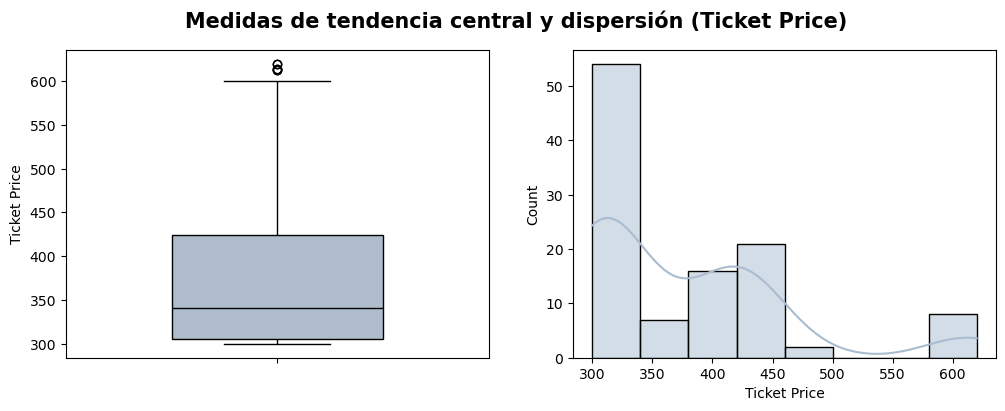

In [287]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Ticket Price"], width=0.5, ax=ax[0], color='#A9BCD0', linecolor = "black")
sns.histplot(originales["Ticket Price"], ax=ax[1], color='#A9BCD0', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Ticket Price)", fontweight = "bold", fontsize=15 )


Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Days from Purchase to Travel)')

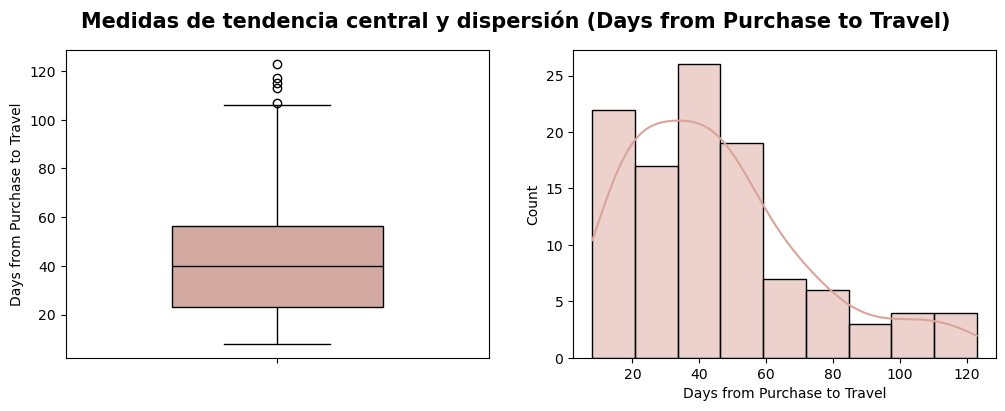

In [288]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Days from Purchase to Travel"], width=0.5, ax=ax[0], color='#DAA49A', linecolor = "black")
sns.histplot(originales["Days from Purchase to Travel"], ax=ax[1], color='#DAA49A', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Days from Purchase to Travel)", fontweight = "bold", fontsize=15 )


Text(0.5, 0.98, 'Medidas de tendencia central y dispersión (Trips)')

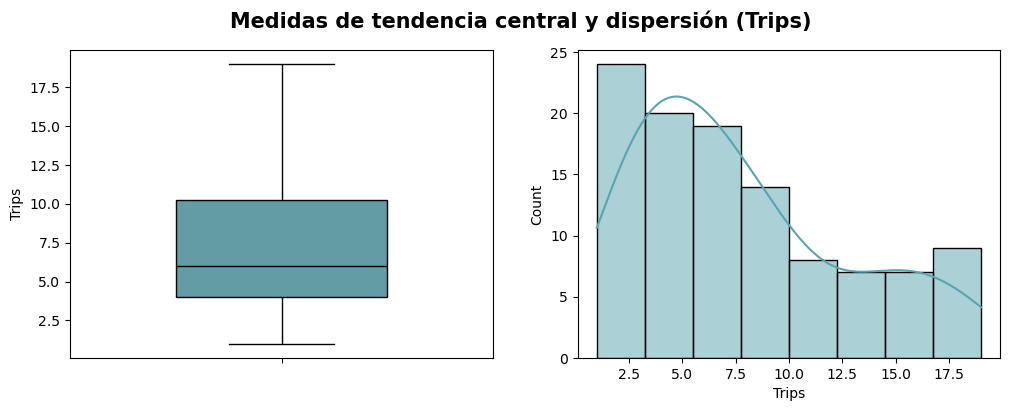

In [289]:
fig, ax = plt.subplots(1,2 ,figsize = (12,4))
sns.boxplot(originales["Trips"], width=0.5, ax=ax[0], color='#58A4B0', linecolor = "black")
sns.histplot(originales["Trips"], ax=ax[1], color='#58A4B0', kde=True)
fig.suptitle("Medidas de tendencia central y dispersión (Trips)", fontweight = "bold", fontsize=15 )


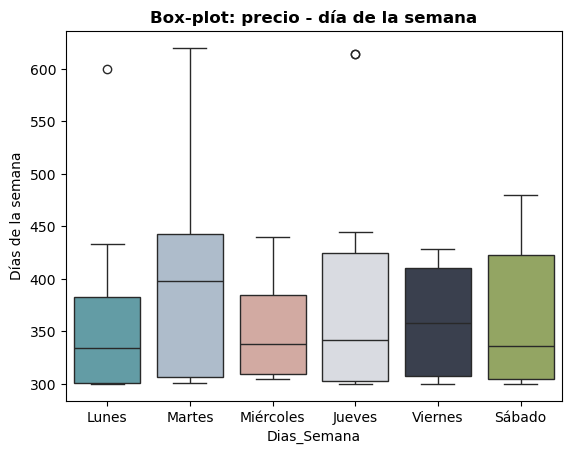

In [290]:
mis_colores = ['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#373F51', "#98B058"]
dias = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado']
df_por_dia = pd.concat([originales.loc[originales[dia] == 1, 'Ticket Price'].rename(dia).reset_index(drop=True) for dia in dias], axis=1)
df_por_dia = df_por_dia.melt(value_vars=df_por_dia.columns, var_name="Dias_Semana", value_name="Precio Ticket", ignore_index=True)


sns.boxplot(df_por_dia, x = "Dias_Semana", y = "Precio Ticket", hue = "Dias_Semana", palette=mis_colores)
plt.title("Box-plot: precio - día de la semana", fontdict = {"fontweight":"bold"})
plt.ylabel("Días de la semana");

Text(0.5, 1.0, 'Matriz de correlación\n(variable dependiente: Ticket Price)')

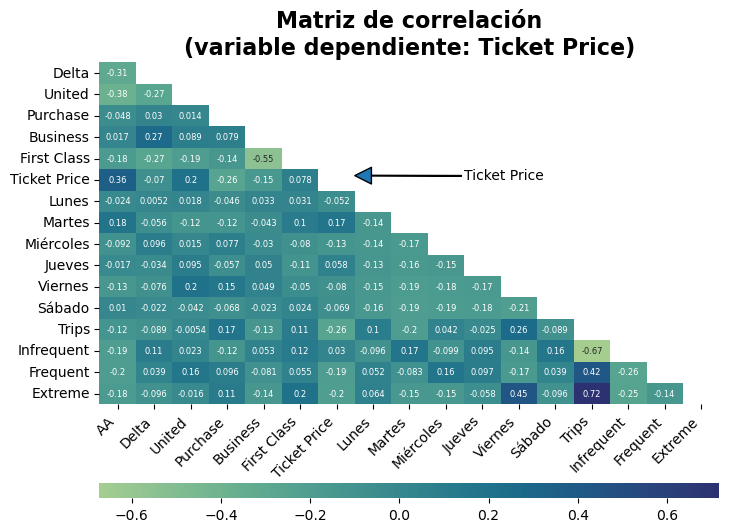

In [291]:
correlación = originales.corr(method="pearson", numeric_only=True, )
columnas    = ['AA', 'Delta', 'United', 'Days from Purchase to Travel', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
filas = ['Delta', 'United', 'Days from Purchase to Travel', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
subcorr = correlación.loc[filas, columnas]
subcorr = subcorr.rename(index = {"Days from Purchase to Travel":"Purchase"}, 
                         columns={"Days from Purchase to Travel":"Purchase"})

#Gráfica de Heatmap
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(subcorr, mask=np.triu(np.ones_like(subcorr, dtype=bool), k=1), annot=True, annot_kws={'fontsize':6},linewidth=0,
           cbar_kws={'orientation': 'horizontal', 'pad': 0.17, 'fraction': 0.09, 'aspect': 40}, cmap="crest", 
            linewidths=1, linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.annotate(text='Ticket Price ',xy=(7,5.3), xytext=(10,5.5), arrowprops= {'width':0.5})
ax.set_title("Matriz de correlación\n(variable dependiente: Ticket Price)", fontdict = {"fontweight":"bold", 'fontsize':16})


# **REGRESION LINEAL SIMPLE:** Ticket Price vs Trips**
# 1-. Diagrama de dispersión y 2-. Construir la ecuación
**Diagrama de dispersión para corroborar la linealidad de los datos respecto a las variables y construir la ecuación que describa al modelo, usando los coeficientes de las variables**

> Al usar el modelo de regresión lineal simple se hace una suposición acerca
de la relación entre x y y. Después usas el método de mínimos cuadrados
para obtener una ecuación de regresión lineal simple estimada. Si existe
una relación significante entre x e y y si el coeficiente de determinación
indica que el ajuste es bueno, la ecuación de regresión estimada te es útil
para estimaciones y predicciones.

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     7.442
Date:                Thu, 04 Sep 2025   Prob (F-statistic):            0.00746
Time:                        20:56:11   Log-Likelihood:                -630.72
No. Observations:                 108   AIC:                             1265.
Df Residuals:                     106   BIC:                             1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        410.7509     14.971     27.437      0.0

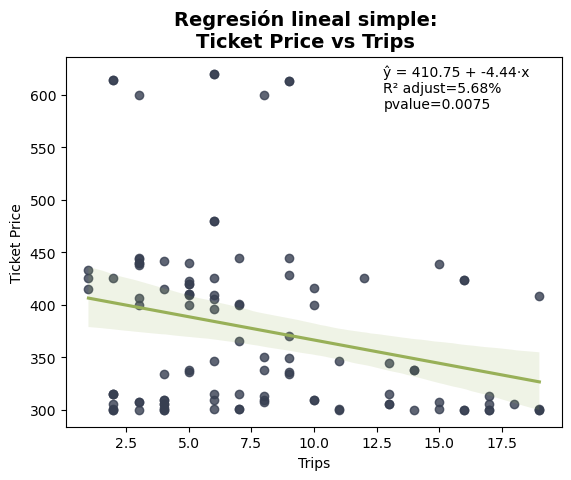

In [292]:
RL = originales[['Ticket Price','Trips']]

X = sm.add_constant(RL['Trips'])
y = RL['Ticket Price']
modelo = sm.OLS(y, X).fit()

b0 = modelo.params['const']
b1 = modelo.params['Trips']
r2 = modelo.rsquared_adj
r = np.sqrt(modelo.rsquared_adj)
p_slope = modelo.pvalues['Trips']

#Tabla de resumen para Mínimos cuadrados (Least Square) en regresion simple
print(modelo.summary())

# Fórmula de regresión lineal estimada
formula_estim = f"ŷ = {b0:.2f} + {b1:.2f}·x\nR² adjust={r2*100:.2f}%\npvalue={p_slope:.2g}"
print(f'Fórmula:{formula_estim}')

# Gráfica de regresión lineal simple
fig, ax = plt.subplots()
sns.regplot(RL, x ='Trips', y ='Ticket Price', 
           scatter_kws={'color':'#373F51'}, line_kws={'color':"#98B058"}, fit_reg=True, ax=ax)
ax.text(0.64, 0.98, formula_estim, transform=ax.transAxes,
        ha='left', va='top', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
fig.suptitle('Regresión lineal simple:\nTicket Price vs Trips', fontsize=14, fontweight = 'bold')
plt.show()



## 3-. Validación estadística
- Calidad del Ajuste(R2)
- Prueba de hipótesis de la ecuación (Valor F y T)
- Prueba de hipótesis de las variables (Valor P y T)

In [403]:
def Analisis_Varianza_simple(x, y):
    """
    Realiza un análisis de varianza para regresión lineal simple.

    Args:
        X (pd.DataFrame): DataFrame con las variables independientes.
        y (pd.Series): Serie con la variable dependiente.

    Returns:
        (pd.DataFrame, pd.Series): Una tupla conteniendo la tabla ANOVA
                                   y una serie con los resultados del modelo.
    """
    x = np.asarray(x, 'float')
    y = np.asarray(y, 'float')
    n = x.size
    x_mean = x.mean() 
    y_mean = y.mean()
    
    # Coeficientes OLS (regresión simple)
    Sxx = ((x - x_mean)**2).sum()
    Sxy = ((x - x_mean)*(y - y_mean)).sum()
    b1 = Sxy / Sxx
    b0 = y_mean - b1*x_mean
    
    # Ajustes y residuales
    yhat = b0 + b1*x
    resid = y - yhat

    # Sumas de cuadrados
    SCE = (resid**2).sum()            
    STC = ((y - y_mean)**2).sum()       
    SCR = STC - SCE       
    
    # Grados de libertad
    df_regresion = 1
    df_error = n - 2

    #Errores
    CMR = SCR / df_regresion       
    ECM = SCE / df_error              
    F_value = CMR / ECM

    #Coefciientes
    R2 = SCR / STC
    se_b1 = np.sqrt(ECM / Sxx)
    t_b1 = b1 / se_b1

    #pvalue
    valorp = stats.f.sf(F_value, 1, n -2)

    #RESULTAODS
    resultados = pd.Series({
        "intersecto(b0)": b0, "pendiente(b1)": b1,
        "SCE": SCE, "STC": STC, "SCR": SCR,
        "CMR": CMR, "ECM": ECM, "F": F_value,
        "R2": R2, "t_b1": t_b1,
        "df_regresion": df_regresion, "df_error": df_error, 'Valor_p':valorp, 'Residuos':resid})
    
    tabla = pd.DataFrame({
        'Fuente de variación': pd.Series(['Regresión', 'Error', 'Total'], index = [0, 1, 2]),
        'Suma de Cuadrados': pd.Series([SCR, SCE, STC], index = [0, 1, 2]),
        'Grados de libertad': pd.Series([1, n-2, n-1], index = [0, 1, 2]),
        'Cuadrado Medio': pd.Series([CMR, ECM], index = [0, 1]),
        'F': pd.Series([F_value], index = [0]),
        'Valor-p': pd.Series([valorp], index = [0])
    }).round(3)

    
    return tabla, resultados


In [404]:
tabla_analisis, resultados_analisis = Analisis_Varianza_simple(x = originales['Trips'], y = originales['Ticket Price'])
print(f'Tabla de ANOVA en regresión lineal:\n {tabla_analisis}')
print(f'Coeficientes de la regresión lineal:\n {resultados_analisis}')

Tabla de ANOVA en regresión lineal:
   Fuente de variación  Suma de Cuadrados  Grados de libertad  Cuadrado Medio  \
0           Regresión          52471.293                   1       52471.293   
1               Error         747389.893                 106        7050.848   
2               Total         799861.185                 107             NaN   

       F  Valor-p  
0  7.442    0.007  
1    NaN      NaN  
2    NaN      NaN  
Coeficientes de la regresión lineal:
 intersecto(b0)                                           410.750867
pendiente(b1)                                             -4.436193
SCE                                                   747389.892546
STC                                                   799861.185185
SCR                                                    52471.292639
CMR                                                    52471.292639
ECM                                                     7050.848043
F                                               

## 4-. Validación de supuestos
- Normalidad en los residuales
- Supuesto de varianza constante (homocedasticidad)
- Detección de datos atípicos
  
> El análisis de residuales es el principal método estadístico para verificar si
las suposiciones del modelo de regresión son válidas. Aún cuando no se
encuentre ninguna violación, esto no necesariamente implica que el
modelo vaya a proporcionar buenas predicciones.

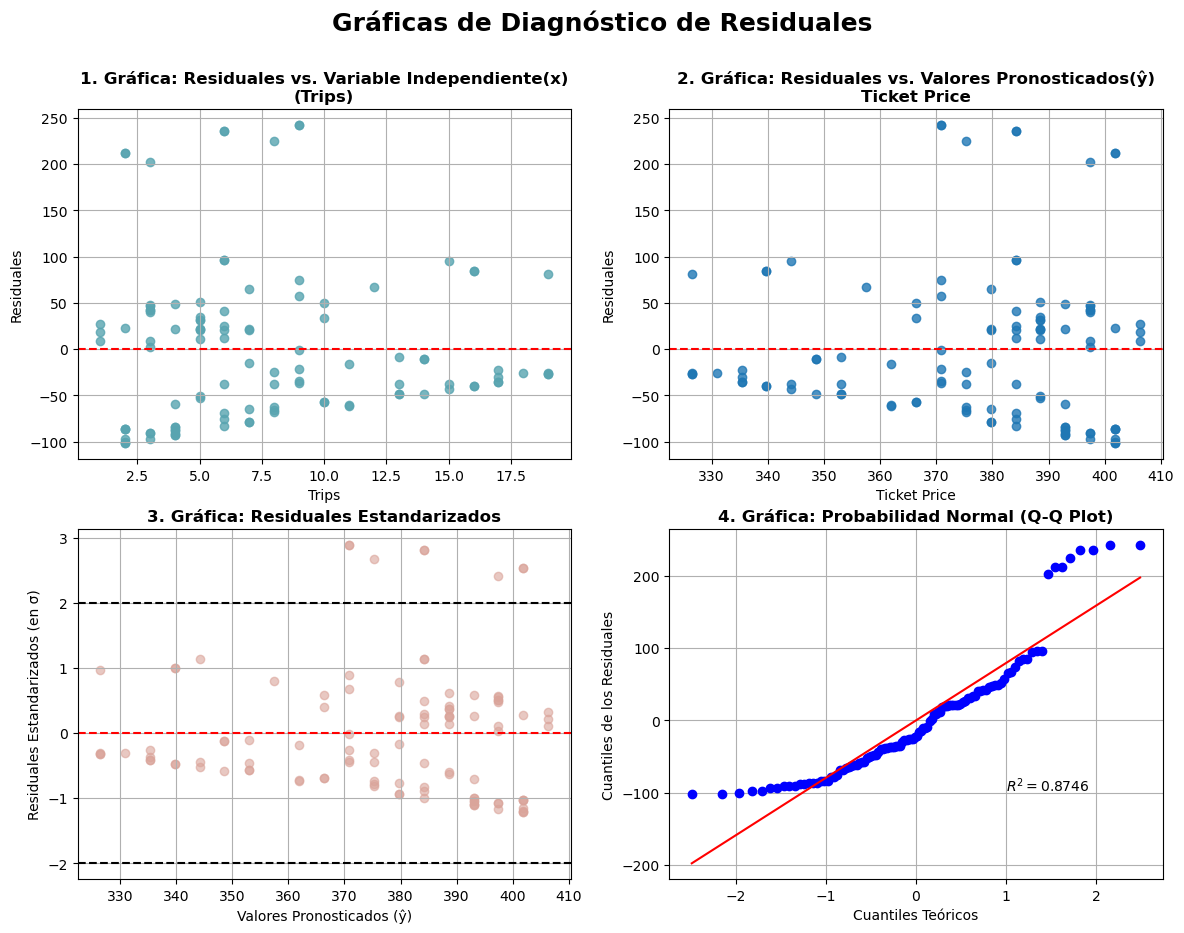

In [295]:
plt.figure(figsize=(14, 10))
plt.suptitle('Gráficas de Diagnóstico de Residuales', fontsize=18, fontweight = 'bold')
#['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#373F51', "#98B058"]
# Gráfica 1: Residuales vs. Variable Independiente (x)
plt.subplot(2, 2, 1)
plt.scatter(originales['Trips'], resultados_analisis['Residuos'], alpha=0.8, color ='#58A4B0')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('1. Gráfica: Residuales vs. Variable Independiente(x)\n(Trips)', fontdict = {'fontweight':'bold'})
plt.xlabel('Trips')
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 2: Residuales vs. Valores Pronosticados (y_pred)
y_pred = resultados_analisis['intersecto(b0)'] + resultados_analisis['pendiente(b1)']*originales['Trips']
plt.subplot(2, 2, 2)
plt.scatter(y_pred, resultados_analisis['Residuos'], alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('2. Gráfica: Residuales vs. Valores Pronosticados(ŷ)\nTicket Price', fontdict = {'fontweight':'bold'})
plt.xlabel('Ticket Price')
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 3: Residuales Estandarizados
residuales_estandarizados = resultados_analisis['Residuos']/np.sqrt(resultados_analisis['ECM'])

plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuales_estandarizados, alpha=0.6, color = '#DAA49A' )
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='black', linestyle='--')
plt.axhline(y=-2, color='black', linestyle='--')
plt.title('3. Gráfica: Residuales Estandarizados', fontdict = {'fontweight':'bold'})
plt.xlabel('Valores Pronosticados (ŷ)')
plt.ylabel('Residuales Estandarizados (en σ)')
plt.grid(True)

# Gráfica 4: Gráfica de Probabilidad Normal (Q-Q Plot)
plt.subplot(2, 2, 4)
stats.probplot(resultados_analisis['Residuos'], dist="norm", plot=plt, rvalue=True)
plt.title('4. Gráfica: Probabilidad Normal (Q-Q Plot)', fontdict = {'fontweight':'bold'})
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuales')
plt.grid(True)

plt.show()

# **REGRESION LINEAL SIMPLE:** Ticket Price vs Days Purchase
# 1-. Diagrama de dispersión y 2-. Construir la ecuación
**Diagrama de dispersión para corroborar la linealidad de los datos respecto a las variables y construir la ecuación que describa al modelo, usando los coeficientes de las variables**

> Al usar el modelo de regresión lineal simple se hace una suposición acerca
de la relación entre x y y. Después usas el método de mínimos cuadrados
para obtener una ecuación de regresión lineal simple estimada. Si existe
una relación significante entre x e y y si el coeficiente de determinación
indica que el ajuste es bueno, la ecuación de regresión estimada te es útil
para estimaciones y predicciones.

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.585
Date:                Thu, 04 Sep 2025   Prob (F-statistic):            0.00693
Time:                        20:56:11   Log-Likelihood:                -630.66
No. Observations:                 108   AIC:                             1265.
Df Residuals:                     106   BIC:                             1271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         413.8300     15.818     26.162      

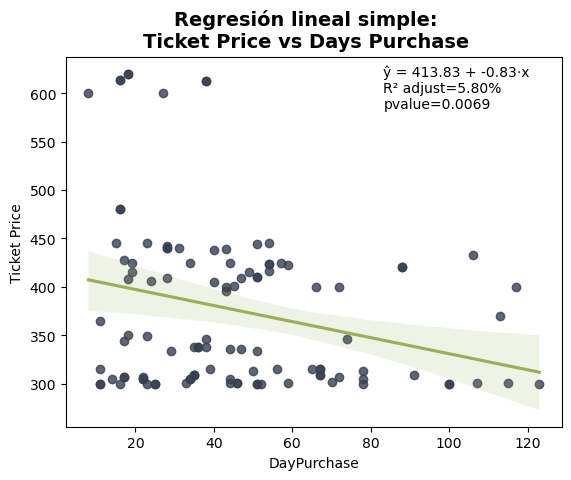

In [296]:
originales.rename(columns = {'Days from Purchase to Travel':'DayPurchase'}, inplace=True)

RL = originales[['Ticket Price','DayPurchase']]
X = sm.add_constant(RL['DayPurchase'])
y = RL['Ticket Price']
modelo = sm.OLS(y, X).fit()

b0 = modelo.params['const']
b1 = modelo.params['DayPurchase']
r2 = modelo.rsquared_adj
r = np.sqrt(modelo.rsquared_adj)
p_slope = modelo.pvalues['DayPurchase']

#Tabla de resumen para Mínimos cuadrados (Least Square) en regresion simple
print(modelo.summary())

# Fórmula de regresión lineal estimada
formula_estim = f"ŷ = {b0:.2f} + {b1:.2f}·x\nR² adjust={r2*100:.2f}%\npvalue={p_slope:.2g}"
print(f'Fórmula:{formula_estim}')

# Gráfica de regresión lineal simple
fig, ax = plt.subplots()
sns.regplot(RL, x ='DayPurchase', y ='Ticket Price', 
           scatter_kws={'color':'#373F51'}, line_kws={'color':"#98B058"}, fit_reg=True, ax=ax)
ax.text(0.64, 0.98, formula_estim, transform=ax.transAxes,
        ha='left', va='top', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
fig.suptitle('Regresión lineal simple:\nTicket Price vs Days Purchase', fontsize=14, fontweight = 'bold')
plt.show()

## 3-. Validación estadística
- Calidad del Ajuste(R2)
- Prueba de hipótesis de la ecuación (Valor F y T)
- Prueba de hipótesis de las variables (Valor P y T)

In [405]:
tabla_analisis2, resultados_analisis2 = Analisis_Varianza_simple(x = originales['DayPurchase'], y = originales['Ticket Price'])
print(f'Tabla de ANOVA en regresión lineal:\n {tabla_analisis}')
print(f'Coeficientes de la regresión lineal:\n {resultados_analisis}')

Tabla de ANOVA en regresión lineal:
   Fuente de variación  Suma de Cuadrados  Grados de libertad  Cuadrado Medio  \
0           Regresión          52471.293                   1       52471.293   
1               Error         747389.893                 106        7050.848   
2               Total         799861.185                 107             NaN   

       F  Valor-p  
0  7.442    0.007  
1    NaN      NaN  
2    NaN      NaN  
Coeficientes de la regresión lineal:
 intersecto(b0)                                           410.750867
pendiente(b1)                                             -4.436193
SCE                                                   747389.892546
STC                                                   799861.185185
SCR                                                    52471.292639
CMR                                                    52471.292639
ECM                                                     7050.848043
F                                               

## 4-. Validación de supuestos
- Normalidad en los residuales
- Supuesto de varianza constante (homocedasticidad)
- Detección de datos atípicos
  
> El análisis de residuales es el principal método estadístico para verificar si
las suposiciones del modelo de regresión son válidas. Aún cuando no se
encuentre ninguna violación, esto no necesariamente implica que el
modelo vaya a proporcionar buenas predicciones.

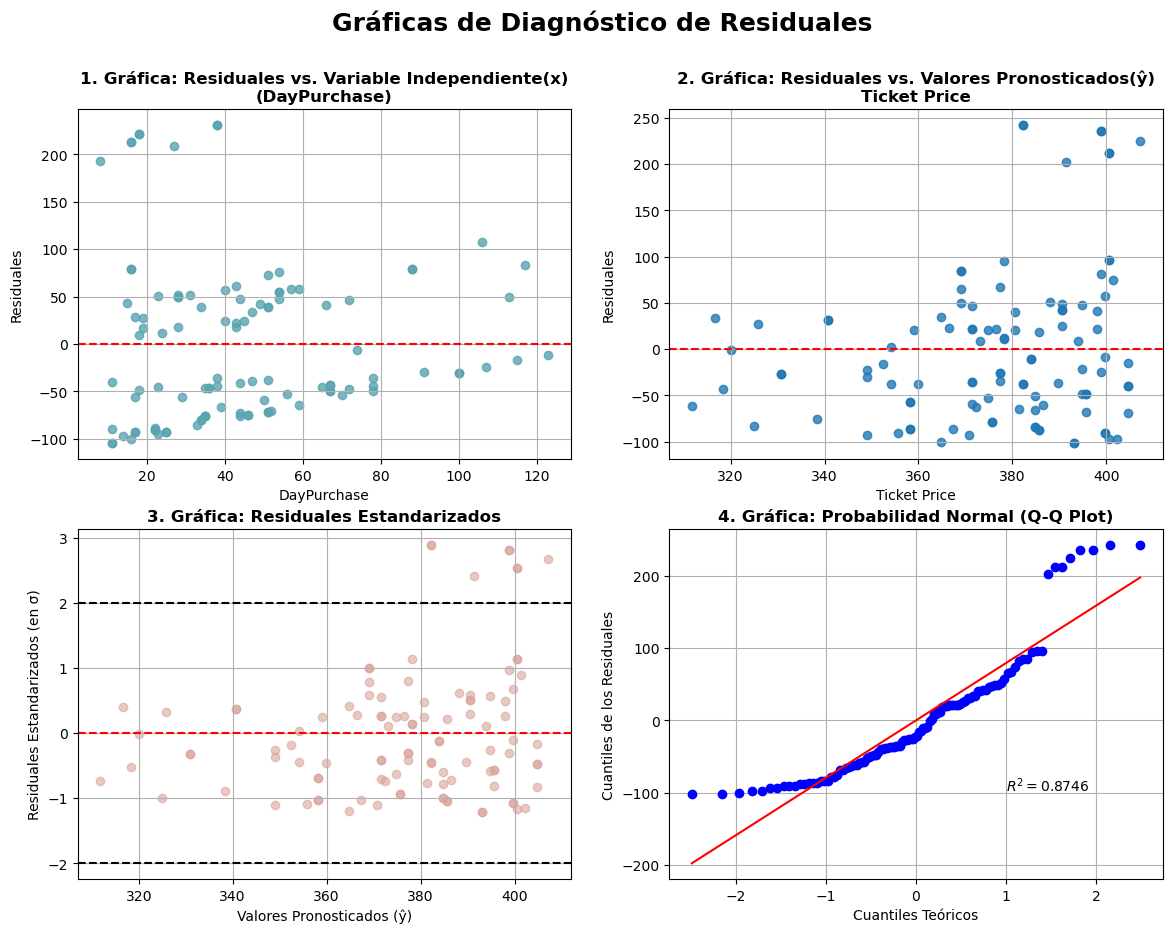

In [298]:
plt.figure(figsize=(14, 10))
plt.suptitle('Gráficas de Diagnóstico de Residuales', fontsize=18, fontweight = 'bold')
#['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#373F51', "#98B058"]
# Gráfica 1: Residuales vs. Variable Independiente (x)
plt.subplot(2, 2, 1)
plt.scatter(originales['DayPurchase'], resultados_analisis2['Residuos'], alpha=0.8, color ='#58A4B0')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('1. Gráfica: Residuales vs. Variable Independiente(x)\n(DayPurchase)', fontdict = {'fontweight':'bold'})
plt.xlabel('DayPurchase')
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 2: Residuales vs. Valores Pronosticados (y_pred)
y_pred = resultados_analisis2['intersecto(b0)'] + resultados_analisis2['pendiente(b1)']*originales['DayPurchase']
plt.subplot(2, 2, 2)
plt.scatter(y_pred, resultados_analisis['Residuos'], alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('2. Gráfica: Residuales vs. Valores Pronosticados(ŷ)\nTicket Price', fontdict = {'fontweight':'bold'})
plt.xlabel('Ticket Price')
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 3: Residuales Estandarizados
residuales_estandarizados = resultados_analisis['Residuos']/np.sqrt(resultados_analisis['ECM'])

plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuales_estandarizados, alpha=0.6, color = '#DAA49A' )
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='black', linestyle='--')
plt.axhline(y=-2, color='black', linestyle='--')
plt.title('3. Gráfica: Residuales Estandarizados', fontdict = {'fontweight':'bold'})
plt.xlabel('Valores Pronosticados (ŷ)')
plt.ylabel('Residuales Estandarizados (en σ)')
plt.grid(True)

# Gráfica 4: Gráfica de Probabilidad Normal (Q-Q Plot)
plt.subplot(2, 2, 4)
stats.probplot(resultados_analisis['Residuos'], dist="norm", plot=plt, rvalue=True)
plt.title('4. Gráfica: Probabilidad Normal (Q-Q Plot)', fontdict = {'fontweight':'bold'})
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuales')
plt.grid(True)

plt.show()

# **REGRESION LINEAL MULTIPLE:** Ticket Price vs Several Features
# 1 -. Construir la ecuación
**Diagrama de dispersión para corroborar la linealidad de los datos respecto a las variables y construir la ecuación que describa al modelo usando los coeficientes de las variables**

> Al usar el modelo de regresión lineal simple se hace una suposición acerca de la relación entre x y y. Después usas el método de mínimos cuadrados
para obtener una ecuación de regresión lineal simple estimada. Si existe
una relación significante entre x e y y si el coeficiente de determinación
indica que el ajuste es bueno, la ecuación de regresión estimada te es útil
para estimaciones y predicciones.

In [387]:
#originales.rename(columns={'DayPurchase':'Days from Purchase to Travel'}, inplace=True)
columnas    = ['AA', 'Delta', 'United', 'DayPurchase', 'Business', 'First Class', 'Lunes', 'Martes', 
               'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']

X = sm.add_constant(originales.loc[:,columnas])
y = originales['Ticket Price']
RLM = sm.OLS(y, X).fit()

b0 = RLM.params['const']
b1 = RLM.params[1:]
r2 = RLM.rsquared_adj
r = np.sqrt(RLM.rsquared_adj)
p_slope = RLM.pvalues

#Tabla de resumen para Mínimos cuadrados (Least Square) en regresion simple
print(RLM.summary())

# Fórmula de regresión lineal estimada
terminos = [f"{coeff:+.2f}·x{i}" for i, coeff in enumerate(RLM.params[1:], 1)]
terminos = ' '.join(terminos)
formula_estim = f"ŷ = {b0:.2f} {terminos}"
print(f'Fórmula:{formula_estim}')

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     9.859
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           8.74e-14
Time:                        23:31:19   Log-Likelihood:                -580.09
No. Observations:                 108   AIC:                             1194.
Df Residuals:                      91   BIC:                             1240.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         248.2184     39.975      6.209      

# 2-. Análisis de multicolinealidad

En el análisis de regresión múltiple, la multicolinealidad expresa la relación entre las variables independientes.

- 1. El primer análisis que debes realizar es verificar si los signos de los coeficientes en el modelo coinciden con los signos obtenidos en la matriz de correlación de cada variable independiente, con la variable dependiente
  2. Al encontrar el cambio de signo en la variable, identificas el modelo como incongruente, por lo que procedes a eliminar la variable menos significativa, Es deci, en el caso en que te enfrentes a la situación en la que debes elegir entre dos variables independientes fuertemente correlacionadas, una forma es elegir la variable que tenga mayor correlación con la variable dependiente,aun sabiendo que se trata solo de una muestra, y no necesariamente representa a la población en su totalidad.
  3. Cuando surge esta última problemática, debes estimar un nuevo modelo; eliminando a la variable menos significativa, de acuerdo con su p-valor en el análisis de la prueba de cada una de las variables independientes, realizado utilizando el estadístico t,


# 2.1-. Obtención del valor crítico de r (correlación) 

En este punto fitlramos la matriz de correlacion para obtener solo quellas variables que presentaran un valor mayor/menor +- 0.1891, siendo este el valor crítico

**Valores obtenidos:**
> Para una muestra de n = 108 (df = 106) y un nivel de significancia de 5.0%:
> El valor t crítico es: 1.9826
> El valor r crítico es: 0.1891


Para una muestra de n = 108 (df = 106) y un nivel de significancia de 5.0%:
El valor t crítico es: 1.9826
El valor r crítico es: 0.1891


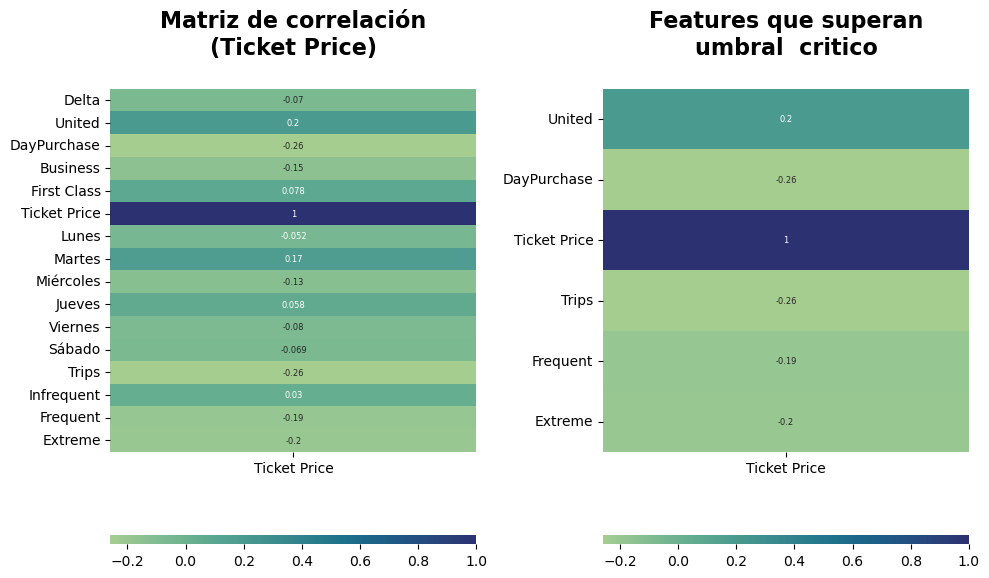

In [343]:
#VALOR CRITICO DE R
n = originales['Ticket Price'].size
alpha = 0.05
df = n - 2

# Encontrar el valor t crítico para una prueba de dos colas
t_critico = stats.t.ppf(1 - alpha / 2, df)
# 3. Convertir el valor t crítico a valor r crítico
r_critico = np.sqrt(t_critico**2 / (t_critico**2 + df))

# --- Imprimir el resultado ---
print(f"Para una muestra de n = {n} (df = {df}) y un nivel de significancia de {alpha*100}%:")
print(f"El valor t crítico es: {t_critico:.4f}")
print(f"El valor r crítico es: {r_critico:.4f}")

#MATRIZ DE CORRELACION
correlación = originales.corr(method="pearson", numeric_only=True, )
columnas    = ['Ticket Price']
filas = ['Delta', 'United', 'DayPurchase', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
subcorr = correlación.loc[filas, columnas]

#Grafica de calor
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.heatmap(subcorr, annot_kws={'fontsize':6},linewidth=0,  annot=True,
           cbar_kws={'orientation': 'horizontal', 'pad': 0.17, 'fraction': 0.09, 'aspect': 40}, cmap="crest", 
            linewidths=1, linecolor='white', ax=ax[0])
ax[0].set_title("Matriz de correlación\n(Ticket Price)\n", fontdict = {"fontweight":"bold", 'fontsize':16})
sns.heatmap(subcorr[(subcorr["Ticket Price"] > r_critico) | (subcorr["Ticket Price"] < r_critico*-1)], 
            annot_kws={'fontsize':6},linewidth=0,  annot=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.17, 'fraction': 0.09, 'aspect': 40}, cmap="crest", 
            linewidths=1, linecolor='white', ax=ax[1])
ax[1].set_title("Features que superan\numbral  critico\n", fontdict = {"fontweight":"bold", 'fontsize':16})
plt.tight_layout()
plt.show()

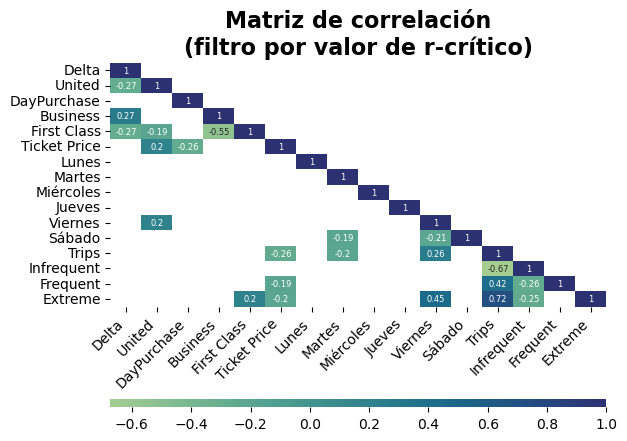

In [382]:
columnas    = ['Delta', 'United', 'DayPurchase', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
filas = ['Delta', 'United', 'DayPurchase', 'Business', 'First Class', 'Ticket Price',
 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
subcorr2 = correlación.loc[filas, columnas]
sns.heatmap(subcorr2[(subcorr2 >= r_critico) | (subcorr2 <= r_critico*-1)], mask=np.triu(np.ones_like(subcorr2, dtype=bool), k=1), 
            annot_kws={'fontsize':6},linewidth=0,  annot=True,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.25, 'fraction': 0.09, 'aspect': 60}, cmap="crest", 
            linewidths=1, linecolor='white')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de correlación\n(filtro por valor de r-crítico)", fontdict = {"fontweight":"bold", 'fontsize':16})
plt.show()

# 2.2-. Comparamos los signos del Coefciente de la formula estimada y el indice de correlacion

Lo siguientes valores presentan signos opuestos y POSIBLE multicolinealidad: 
- **Delta:** Si presenta relación con otras variables independientes, sin embargo su correlacion con otras variables no es tan fuerte, evaluar posteriormente su valor t, F y p
- **Martes:** Si presenta relación con otras variables independientes, sin embargo su correlacion con otras variables no es tan fuerte, evaluar posteriormente su valor t, F y p
- **Trips:** Si presenta relación con otras variables independientes y también presenta correlación MUY FUERTE. Evaluar posteriormente su valor t, F y p
- **Infrequent:** Si presenta relación con otras variables independientes, sin embargo su correlacion con otras variables no es tan fuerte, evaluar posteriormente su valor t, F y p

> En este caso puedes ver en la gráfica que el signo de las variables previamente mencionadas en la matriz de correlación, no
coincide con el signo del coeficiente estimado en la ecuación. Esto es un efecto de la multicolinealidad existente entre las variables independientes.

> El error más común en este tipo de situaciones es pensar que quitando del modelo dichas variables se soluciona el problema y el modelo es confiable, suponiendo que son estas las variables que presentan multicolinealidad con otras variables independientes, lo cual no necesariamente es correcto.

> Es por ello importante revisar nuevamente la gráfica de Matriz de correlacion (Filtrada por el valor critico de r) y OBSERVAR si existe  multicolinealidad con alguna otra variable


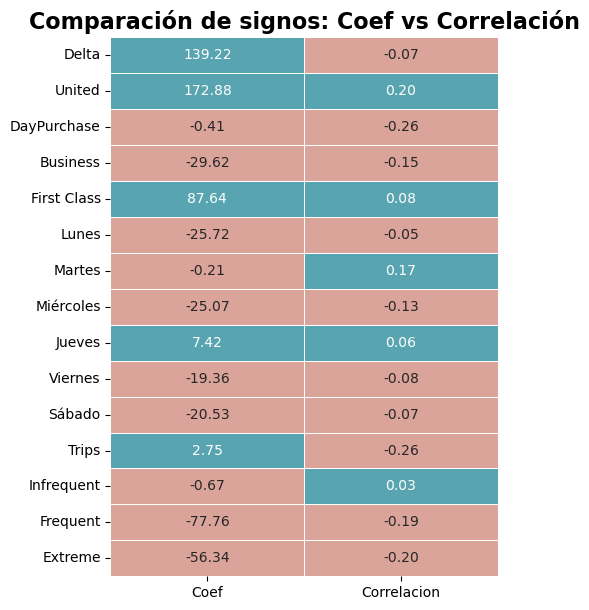

In [384]:
# UNIMOS DATAFRAME DE COEF Y GRADO DE CORRELACION
SerieRLM = pd.DataFrame(RLM.params[2:]).rename(columns={0:"Coef"})
subcorr = subcorr.rename(columns={"Ticket Price":"Correlacion"})
signo= SerieRLM.merge(subcorr, left_index=True, right_index=True )

#CREAMOS UN DATAFRAME FALSO PARA REPRESENTAR LOS COLORES EN EL HEATMAP
signo_color = np.sign(signo)

#GRAFICAMOS HEATMAP
mis_colores = ["#DAA49A", "#58A4B0"]
plt.figure(figsize=(5, 7))
sns.heatmap(signo_color, annot=signo,fmt=".2f",  cmap=mis_colores, linewidths=0.5, linecolor='white', cbar=False)
plt.title("Comparación de signos: Coef vs Correlación", fontdict = {"fontweight":"bold", 'fontsize':16});


## 3-. Validación estadística (Ya se realizó en conjunto con la obtencion de la ecuación de estimacion)
> No obstante, a partir de este punto comenzaremos a eliminar variables que de acuerdo al valor p no presentan significancia estadística, comenzando con los valores más grandes.
> 
- Calidad del Ajuste(R2)
- Prueba de hipótesis de la ecuación (Valor F y T)
- Prueba de hipótesis de las variables (Valor P y T)

Aún habiendo detectado una incongruencia en el modelo obtenido, es necesario continuar para tener la información suficiente (valor t, F y p) y así poder plantear un nuevo modelo. Este proceso se puede repetir las veces que sea necesario, hasta encontrar un modelo congruente.

In [408]:
# El análisis para obtener la ecuación estimada de regresión multiple incluye solo el análisis del estadístico t
print(RLM.summary())

# Procedemos a aplicar el funcion para obtener el estadistico F global
columnas    = ['AA', 'Delta', 'United', 'DayPurchase', 'Business', 'First Class', 'Lunes', 'Martes', 
               'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Trips','Infrequent', 'Frequent', 'Extreme']
def Analisis_Varianza_Multiple(X, y):
    """
    Realiza un análisis de varianza para regresión lineal múltiple.

    Args:
        X (pd.DataFrame): DataFrame con las variables independientes.
        y (pd.Series): Serie con la variable dependiente.

    Returns:
        (pd.DataFrame, pd.Series): Una tupla conteniendo la tabla ANOVA
                                   y una serie con los resultados del modelo.
    """
    # Asegurarse de que y es un array de numpy
    y = np.asarray(y, dtype=float)

    # Añadir una constante (el intercepto b0) a nuestras variables X
    # statsmodels no lo hace por defecto
    X_con_constante = sm.add_constant(X)
    n = len(y)
    k = X.shape[1] # Número de variables predictoras

    # 1. Ajustar el modelo de regresión lineal múltiple
    modelo = sm.OLS(y, X_con_constante).fit()

    # 2. Extraer los valores necesarios del objeto 'modelo'
    y_mean = y.mean()
    yhat = modelo.predict()
    resid = modelo.resid # Equivalente a y - yhat

    # Sumas de cuadrados
    SCE = modelo.ssr  # Suma de Cuadrados del Error (Residual)
    SCR = modelo.ess  # Suma de Cuadrados Explicada (Regresión)
    STC = SCR + SCE   # Suma de Cuadrados Total

    # Grados de libertad
    df_regresion = k
    df_error = n - k - 1
    df_total = n - 1

    # Cuadrados Medios
    CMR = modelo.mse_model  # Cuadrado Medio de la Regresión
    ECM = modelo.mse_resid  # Cuadrado Medio del Error

    # Estadísticos F y R^2
    F_value = modelo.fvalue
    valorp = modelo.f_pvalue
    R2 = modelo.rsquared

    # 3. Organizar los resultados como en tu función original
    resultados = pd.Series({
        "Coeficientes": modelo.params, # Serie con b0, b1, b2, ...
        "SCE": SCE, "STC": STC, "SCR": SCR,
        "CMR": CMR, "ECM": ECM, "F": F_value,
        "R2": R2,
        "df_regresion": df_regresion, "df_error": df_error,
        'Valor_p_F': valorp, 'Residuos': resid
    })

    tabla = pd.DataFrame({
        'Fuente de variación': ['Regresión', 'Error', 'Total'],
        'Suma de Cuadrados': [SCR, SCE, STC],
        'Grados de libertad': [df_regresion, df_error, df_total],
        'Cuadrado Medio': [CMR, ECM, np.nan], # np.nan para que no aparezca en la fila Total
        'F': [F_value,  np.nan, np.nan],
        'Valor-p': [valorp, np.nan, np.nan]
    }).round(4)

    return tabla, resultados
    
tabla_analisis_multiple, resultados_analisis_multiple = Analisis_Varianza_Multiple(X= originales.loc[:,columnas], y = originales['Ticket Price'])
print(f'Tabla de ANOVA en regresión lineal:\n {tabla_analisis}')
print(f'Coeficientes de la regresión lineal:\n {resultados_analisis}')

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     9.859
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           8.74e-14
Time:                        00:07:13   Log-Likelihood:                -580.09
No. Observations:                 108   AIC:                             1194.
Df Residuals:                      91   BIC:                             1240.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         248.2184     39.975      6.209      

# 4 -. Re-construir la ecuación de regresión lineal con menos variables

**Historial de eliminación de variables independientes en el modelo de regresion líneal múltiple**
> 1-. Eliminamos las variables Trips, Martes e Infrequent ya que coinciden perfectamente con el análisis de multicolinealidad y presentan un valor de F, t muy altos y un p menor a 0.05.

> 2-. Sorprendentemente aunque la variables de los días de la semana no presentan indicios de multicolinearidad (signos opuestos y fuerte relacion con otras variables independientes) presenta un varlo muy alto de p

> 3-. Posteriormente eliminamos a la variable Extreme, que si bien no presenta signos opuestos, tienen alta correlación con otras variables independientes

> 4-. Al eliminar el resto de las variables, los valores de p para la variable Bussines no fue menor a 0.05 y por lo tanto tambien fue descartada. 

In [418]:
columnas    = ['AA', 'Delta', 'United', 'DayPurchase', 'First Class', 'Frequent']

X = sm.add_constant(originales.loc[:,columnas])
y = originales['Ticket Price']
RLM2 = sm.OLS(y, X).fit()

print(RLM2.summary())

terminos = [f"{coeff:+.2f}·x{i}" for i, coeff in enumerate(RLM2.params[1:], 1)]
terminos = ' '.join(terminos)
formula_estim = f"ŷ = {b0:.2f} {terminos}"

print("="*80)
print(f'Fórmula:{formula_estim}')
print("="*80)


                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.27
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.27e-17
Time:                        00:47:17   Log-Likelihood:                -586.18
No. Observations:                 108   AIC:                             1186.
Df Residuals:                     101   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         233.6932     21.207     11.020      

In [449]:
columnas    = ['AA', 'Delta', 'United', 'DayPurchase', 'First Class', 'Frequent', 'Ticket Price']
filas    = ['AA', 'Delta', 'United', 'DayPurchase', 'First Class', 'Frequent', 'Ticket Price']

correlacion_final = originales.loc[:, columnas].corr()
correlación_final = pd.DataFrame(correlacion_final)

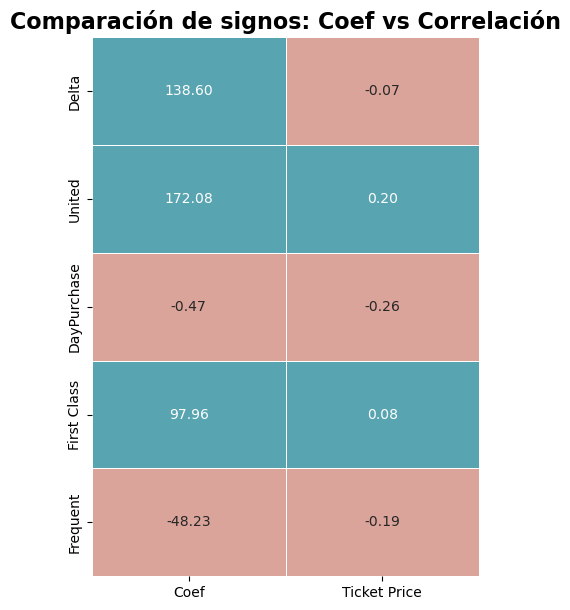

In [452]:
SerieRLM2 = pd.DataFrame(RLM2.params[2:]).rename(columns={0:"Coef"})
correlacion_final = correlacion_final["Ticket Price"].rename({"Ticket Price":"Correlacion"})
signo_final = SerieRLM2.merge(correlacion_final, left_index=True, right_index=True )

#CREAMOS UN DATAFRAME FALSO PARA REPRESENTAR LOS COLORES EN EL HEATMAP
signo_color = np.sign(signo_final)

#GRAFICAMOS HEATMAP
mis_colores = ["#DAA49A", "#58A4B0"]
plt.figure(figsize=(5, 7))
sns.heatmap(signo_color, annot=signo_final,fmt=".2f",  cmap=mis_colores, linewidths=0.5, linecolor='white', cbar=False)
plt.title("Comparación de signos: Coef vs Correlación", fontdict = {"fontweight":"bold", 'fontsize':16});


# 4 -. Re-construir la ecuación de regresión lineal con menos variables- SEGUNDA PARTE

**Historial de eliminación de variables independientes en el modelo de regresion líneal múltiple**
> 1-. Eliminamos la variable Delta al presentar incongruencia en los signos (y posible multicolinearidad) como se puede observar en la matriz superior, Sin emabrgo es una variable que presenta un valor p menor a 0.05


In [467]:
columnas    = ['AA', 'United', 'DayPurchase', 'First Class', 'Frequent']

X = sm.add_constant(originales.loc[:,columnas])
y = originales['Ticket Price']
RLM2 = sm.OLS(y, X).fit()

print(RLM2.summary())

terminos = [f"{coeff:+.2f}·x{i}" for i, coeff in enumerate(RLM2.params[1:], 1)]
terminos = ' '.join(terminos)
formula_estim = f"ŷ = {b0:.2f} {terminos}"

print("="*80)
print(f'Fórmula:{formula_estim}')
print("="*80)

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     13.57
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           3.81e-10
Time:                        01:42:49   Log-Likelihood:                -606.86
No. Observations:                 108   AIC:                             1226.
Df Residuals:                     102   BIC:                             1242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         330.6682     19.060     17.349      

## CONCLUSIÓN:
> Todas las métricas de evaluación de modelos (principalmente R cuadrada) apuntan a que el primer modelo es superior. 
La variable Delta que fue eliminada es estadísticamente muy significativa y no aporta un gran valor predictivo y se debe eliminar en el modelo, ya que al eliminar la variable nuestro modelo aumenta el poder predictivo de R cuadrada

In [468]:
tabla_analisis_multiple2, resultados_analisis_multipl2 = Analisis_Varianza_Multiple(X= originales.loc[:,columnas], y = originales['Ticket Price'])
print(f'Tabla de ANOVA en regresión lineal:\n {tabla_analisis_multiple2}')
print(f'Coeficientes de la regresión lineal:\n {resultados_analisis_multipl2}')

Tabla de ANOVA en regresión lineal:
   Fuente de variación  Suma de Cuadrados  Grados de libertad  Cuadrado Medio  \
0           Regresión        319480.6271                   5      63896.1254   
1               Error        480380.5581                 102       4709.6133   
2               Total        799861.1852                 107             NaN   

         F  Valor-p  
0  13.5672      0.0  
1      NaN      NaN  
2      NaN      NaN  
Coeficientes de la regresión lineal:
 Coeficientes    const          330.668152
AA             103.9...
SCE                                                 480380.558073
STC                                                 799861.185185
SCR                                                 319480.627112
CMR                                                  63896.125422
ECM                                                   4709.613314
F                                                        13.56717
R2                                                    

/var/folders/k7/778gcqg54pnfx9lbjbsj7pgm0000gn/T/ipykernel_2162/1878611044.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred = resultados_analisis_multipl2['Coeficientes'][0] + resultados_analisis_multipl2['Coeficientes'][1]*x + resultados_analisis_multipl2['Coeficientes'][2]*x + resultados_analisis_multipl2['Coeficientes'][3]*x + resultados_analisis_multipl2['Coeficientes'][4]*x  + resultados_analisis_multipl2['Coeficientes'][5]*x


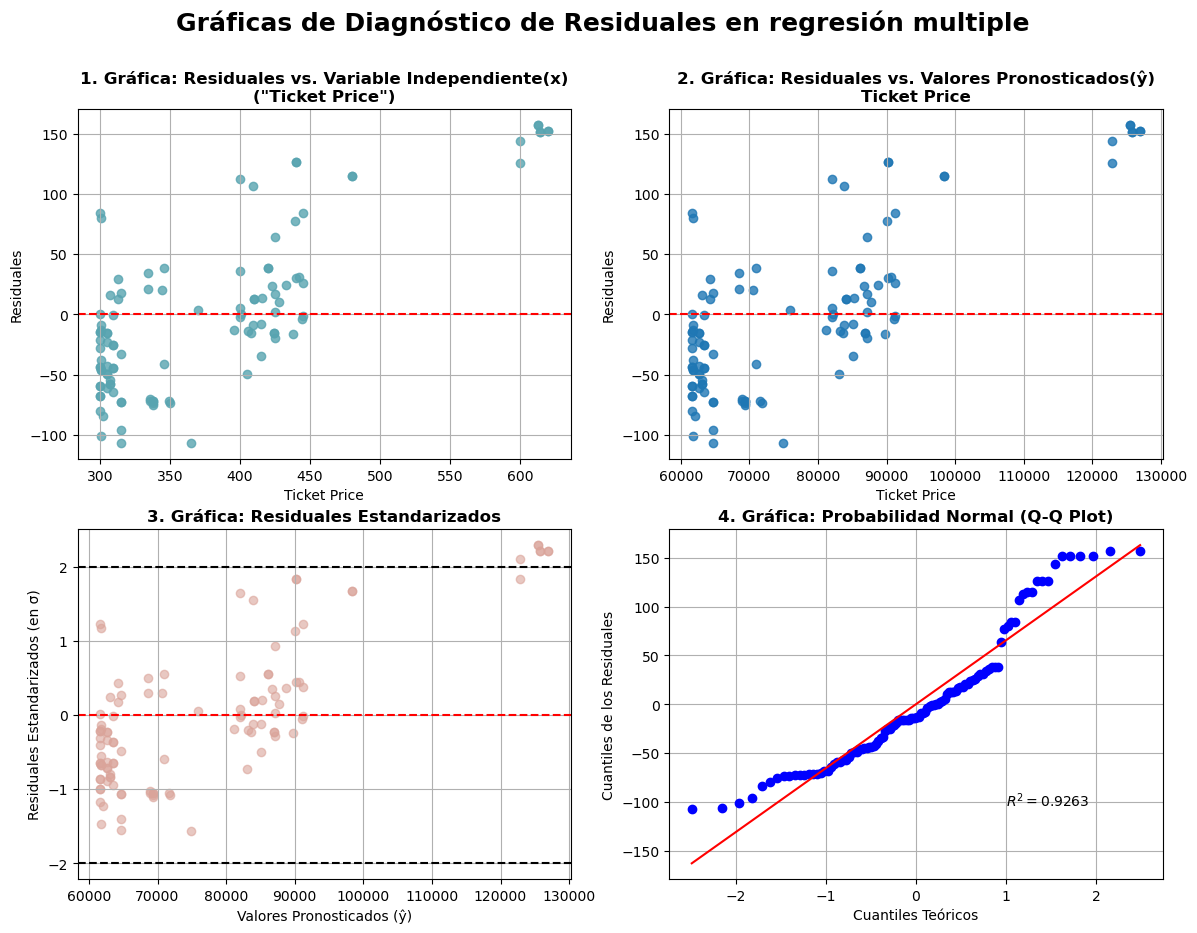

In [484]:
plt.figure(figsize=(14, 10))
plt.suptitle('Gráficas de Diagnóstico de Residuales en regresión multiple', fontsize=18, fontweight = 'bold')
#['#58A4B0', '#A9BCD0', '#DAA49A', '#D8DBE2', '#373F51', "#98B058"]
# Gráfica 1: Residuales vs. Variable Independiente (x)
plt.subplot(2, 2, 1)
plt.scatter(originales['Ticket Price'], resultados_analisis_multipl2['Residuos'], alpha=0.8, color ='#58A4B0')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('1. Gráfica: Residuales vs. Variable Independiente(x)\n("Ticket Price")', fontdict = {'fontweight':'bold'})
plt.xlabel("Ticket Price")
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 2: Residuales vs. Valores Pronosticados (y_pred)
x = originales['Ticket Price']
y_pred = resultados_analisis_multipl2['Coeficientes'][0] + resultados_analisis_multipl2['Coeficientes'][1]*x + resultados_analisis_multipl2['Coeficientes'][2]*x + resultados_analisis_multipl2['Coeficientes'][3]*x + resultados_analisis_multipl2['Coeficientes'][4]*x  + resultados_analisis_multipl2['Coeficientes'][5]*x 
plt.subplot(2, 2, 2)
plt.scatter(y_pred, resultados_analisis_multipl2['Residuos'], alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('2. Gráfica: Residuales vs. Valores Pronosticados(ŷ)\nTicket Price', fontdict = {'fontweight':'bold'})
plt.xlabel('Ticket Price')
plt.ylabel('Residuales')
plt.grid(True)

# Gráfica 3: Residuales Estandarizados
residuales_estandarizados = resultados_analisis_multipl2['Residuos']/np.sqrt(resultados_analisis_multipl2['ECM'])

plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuales_estandarizados, alpha=0.6, color = '#DAA49A' )
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='black', linestyle='--')
plt.axhline(y=-2, color='black', linestyle='--')
plt.title('3. Gráfica: Residuales Estandarizados', fontdict = {'fontweight':'bold'})
plt.xlabel('Valores Pronosticados (ŷ)')
plt.ylabel('Residuales Estandarizados (en σ)')
plt.grid(True)

# Gráfica 4: Gráfica de Probabilidad Normal (Q-Q Plot)
plt.subplot(2, 2, 4)
stats.probplot(resultados_analisis_multipl2['Residuos'], dist="norm", plot=plt, rvalue=True)
plt.title('4. Gráfica: Probabilidad Normal (Q-Q Plot)', fontdict = {'fontweight':'bold'})
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuales')
plt.grid(True)

plt.show()

const          330.668152
AA             103.997393
United          97.506200
DayPurchase     -0.602702
First Class     44.049063
Frequent       -40.701599
dtype: float64